# Practica 2: Predicción de Series Temporales

# Autores: 

- Alejandro López Cuéllar
- Miguel Ángel Vera Frutos
- Alejandro Belda Fernández


# Importación de librerías

In [586]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import os
import locale
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
from sklearn.impute import KNNImputer
from skforecast.model_selection import backtesting_forecaster
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.linear_model import LinearRegression
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect

#  Establecer la configuración regional

Para Linux y MacOS:

In [587]:
locale.setlocale(locale.LC_TIME, "es_ES.UTF-8")

'es_ES.UTF-8'

Para Windows

In [588]:

locale.setlocale(locale.LC_TIME, "Spanish_Spain.1252")

'Spanish_Spain.1252'

# Definición rutas ficheros

In [589]:
ruta = "dataset/Aljorrahorarias2017.xls"
ruta2 = "dataset/Aljorrahorarias2018.xls"
ruta3 = "dataset/Aljorrahorarias2019.xls"
ruta4 = "dataset/Aljorrahorarias2020.xls"
ruta5 = "dataset/Aljorrahorarias2021.xls"
ruta6 = "dataset/Aljorrahorarias2022.xls"


# Lectura de datos

In [590]:
# Leer el archivo completo
df = pd.read_excel(ruta, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
df["Fecha"] = df["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df.set_index("Fecha", inplace=True)


# Leer el archivo completo
df2 =  pd.read_excel(ruta2, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
df2["Fecha"] = df2["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df2.set_index("Fecha", inplace=True)

# Leer el archivo completo
df3 =  pd.read_excel(ruta3, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
df3["Fecha"] = df3["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df3.set_index("Fecha", inplace=True)

# Leer el archivo completo
df4 =  pd.read_excel(ruta4, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
df4["Fecha"] = df4["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df4.set_index("Fecha", inplace=True)

# Leer el archivo completo
df5 =  pd.read_excel(ruta5, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
# Establecer los minutos a 00, y redondear la fecha a la hora
df5["Fecha"] = df5["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df5.set_index("Fecha", inplace=True)

# Leer el archivo completo
df6 =  pd.read_excel(ruta6, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
# Establecer los minutos a 00, y redondear la fecha a la hora
df6["Fecha"] = df6["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df6.set_index("Fecha", inplace=True)




*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\Usuario\AppData\Local\Temp\ipykernel_9492\1045028487.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["Fecha"] = df["Fecha"].dt.floor('H')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\Usuario\AppData\Local\Temp\ipykernel_9492\1045028487.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df2["Fecha"] = df2["Fecha"].dt.floor('H')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\Usuario\AppData\Local\Temp\ipykernel_9492\1045028487.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df3["Fecha"] = df3["Fecha"].dt.floor('H')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\Usuario\AppData\Local\Temp\ipykernel_9492\1045028487.py:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df4["Fecha"] = df4["Fecha"].dt.floor('H')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\Usuario\AppData\Local\Temp\ipykernel_9492\1045028487.py:33: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df5["Fecha"] = df5["Fecha"].dt.floor('H')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\Usuario\AppData\Local\Temp\ipykernel_9492\1045028487.py:41: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df6["Fecha"] = df6["Fecha"].dt.floor('H')


# Unir dataset

In [591]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    7129 non-null   float64
 1   NO2 (µg/m³N)   7129 non-null   float64
 2   SO2 (µg/m³N)   7580 non-null   float64
 3   O3 (µg/m³N)    8715 non-null   float64
 4   TMP (ºC)       8748 non-null   float64
 5   HR (% H.R.)    8748 non-null   float64
 6   NOX (µg/m³N)   7129 non-null   float64
 7   DD (grados)    8748 non-null   float64
 8   PRB (mb)       8748 non-null   float64
 9   RS (W/m³)      8748 non-null   float64
 10  VV (m/s)       8748 non-null   float64
 11  C6H6 (µg/m³N)  0 non-null      float64
 12  C7H8 (µg/m³N)  0 non-null      float64
 13  XIL (µg/m³N)   0 non-null      float64
 14  PM10 (µg/m³N)  8747 non-null   float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 1.1 MB


Como podemos ver tiene una gran cantidad de variables nulas

In [592]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2018-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    7583 non-null   float64
 1   NO2 (µg/m³N)   7583 non-null   float64
 2   SO2 (µg/m³N)   8551 non-null   float64
 3   O3 (µg/m³N)    8593 non-null   float64
 4   TMP (ºC)       8657 non-null   float64
 5   HR (% H.R.)    8657 non-null   float64
 6   NOX (µg/m³N)   7583 non-null   float64
 7   DD (grados)    8657 non-null   float64
 8   PRB (mb)       8657 non-null   float64
 9   RS (W/m³)      8657 non-null   float64
 10  VV (m/s)       8657 non-null   float64
 11  C6H6 (µg/m³N)  0 non-null      float64
 12  C7H8 (µg/m³N)  0 non-null      float64
 13  XIL (µg/m³N)   0 non-null      float64
 14  PM10 (µg/m³N)  8178 non-null   float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 1.1 MB


Tambien tiene muchas columnas nulas

In [593]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2019-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    7932 non-null   float64
 1   NO2 (µg/m³N)   7932 non-null   float64
 2   SO2 (µg/m³N)   7635 non-null   float64
 3   O3 (µg/m³N)    8125 non-null   float64
 4   TMP (ºC)       8223 non-null   float64
 5   HR (% H.R.)    8223 non-null   float64
 6   NOX (µg/m³N)   7932 non-null   float64
 7   DD (grados)    8223 non-null   float64
 8   PRB (mb)       8223 non-null   float64
 9   RS (W/m³)      8223 non-null   float64
 10  VV (m/s)       8224 non-null   float64
 11  C6H6 (µg/m³N)  3156 non-null   float64
 12  C7H8 (µg/m³N)  3156 non-null   float64
 13  XIL (µg/m³N)   3156 non-null   float64
 14  PM10 (µg/m³N)  8220 non-null   float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 1.1 MB


In [594]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2020-01-01 00:00:00 to 2020-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    8464 non-null   float64
 1   NO2 (µg/m³N)   8464 non-null   float64
 2   SO2 (µg/m³N)   7944 non-null   float64
 3   O3 (µg/m³N)    8693 non-null   float64
 4   TMP (ºC)       8682 non-null   float64
 5   HR (% H.R.)    8682 non-null   float64
 6   NOX (µg/m³N)   8464 non-null   float64
 7   DD (grados)    8682 non-null   float64
 8   PRB (mb)       8682 non-null   float64
 9   RS (W/m³)      8682 non-null   float64
 10  VV (m/s)       8682 non-null   float64
 11  C6H6 (µg/m³N)  6988 non-null   float64
 12  C7H8 (µg/m³N)  6988 non-null   float64
 13  XIL (µg/m³N)   6988 non-null   float64
 14  PM10 (µg/m³N)  8498 non-null   float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 1.1 MB


In [595]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2021-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    8245 non-null   float64
 1   NO2 (µg/m³N)   8245 non-null   float64
 2   SO2 (µg/m³N)   7812 non-null   float64
 3   O3 (µg/m³N)    8214 non-null   float64
 4   TMP (ºC)       8248 non-null   float64
 5   HR (% H.R.)    8248 non-null   float64
 6   NOX (µg/m³N)   8245 non-null   float64
 7   DD (grados)    8248 non-null   float64
 8   PRB (mb)       8248 non-null   float64
 9   RS (W/m³)      8248 non-null   float64
 10  VV (m/s)       8248 non-null   float64
 11  C6H6 (µg/m³N)  3925 non-null   float64
 12  C7H8 (µg/m³N)  3925 non-null   float64
 13  XIL (µg/m³N)   3925 non-null   float64
 14  PM10 (µg/m³N)  8004 non-null   float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 1.1 MB


In [596]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2022-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    8639 non-null   float64
 1   NO2 (µg/m³N)   8639 non-null   float64
 2   SO2 (µg/m³N)   6868 non-null   float64
 3   O3 (µg/m³N)    4286 non-null   float64
 4   TMP (ºC)       8693 non-null   float64
 5   HR (% H.R.)    8693 non-null   float64
 6   NOX (µg/m³N)   8639 non-null   float64
 7   DD (grados)    8693 non-null   float64
 8   PRB (mb)       8693 non-null   float64
 9   RS (W/m³)      8693 non-null   float64
 10  VV (m/s)       8693 non-null   float64
 11  C6H6 (µg/m³N)  0 non-null      float64
 12  C7H8 (µg/m³N)  0 non-null      float64
 13  XIL (µg/m³N)   0 non-null      float64
 14  PM10 (µg/m³N)  8097 non-null   float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 1.1 MB


Tiene una gran cantidad de columnas nulas tambien

In [597]:
data= pd.concat([df3,df4,df5,df6])

# Guardar en un archivo CSV
df.to_csv('dataset.csv', index=False)

# Analisis y preprocesamiento

## Información del dataset

In [598]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2019-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    33280 non-null  float64
 1   NO2 (µg/m³N)   33280 non-null  float64
 2   SO2 (µg/m³N)   30259 non-null  float64
 3   O3 (µg/m³N)    29318 non-null  float64
 4   TMP (ºC)       33846 non-null  float64
 5   HR (% H.R.)    33846 non-null  float64
 6   NOX (µg/m³N)   33280 non-null  float64
 7   DD (grados)    33846 non-null  float64
 8   PRB (mb)       33846 non-null  float64
 9   RS (W/m³)      33846 non-null  float64
 10  VV (m/s)       33847 non-null  float64
 11  C6H6 (µg/m³N)  14069 non-null  float64
 12  C7H8 (µg/m³N)  14069 non-null  float64
 13  XIL (µg/m³N)   14069 non-null  float64
 14  PM10 (µg/m³N)  32819 non-null  float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 4.5 MB


## Visualización y tratamiento de valores faltantes

In [599]:
data.isna().sum()

NO (µg/m³N)       1784
NO2 (µg/m³N)      1784
SO2 (µg/m³N)      4805
O3 (µg/m³N)       5746
TMP (ºC)          1218
HR (% H.R.)       1218
NOX (µg/m³N)      1784
DD (grados)       1218
PRB (mb)          1218
RS (W/m³)         1218
VV (m/s)          1217
C6H6 (µg/m³N)    20995
C7H8 (µg/m³N)    20995
XIL (µg/m³N)     20995
PM10 (µg/m³N)     2245
Ruido (dBA)      35064
dtype: int64

In [600]:
data = data.drop(columns=['Ruido (dBA)'])

In [601]:
data.head()

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N)
Fecha,,,,,,,,,,,,,,,
2019-01-01 00:00:00,3.0,18.0,14.0,55.0,11.0,72.0,23.0,295.0,1029.0,3.0,1.0,NaN,NaN,NaN,10.0
2019-01-01 01:00:00,4.0,19.0,14.0,57.0,11.0,61.0,24.0,292.0,1029.0,2.0,1.0,NaN,NaN,NaN,8.0
2019-01-01 02:00:00,4.0,20.0,16.0,48.0,10.0,65.0,26.0,299.0,1029.0,2.0,1.0,NaN,NaN,NaN,12.0
2019-01-01 03:00:00,4.0,18.0,14.0,47.0,9.0,68.0,23.0,302.0,1028.0,3.0,1.0,NaN,NaN,NaN,8.0
2019-01-01 04:00:00,4.0,12.0,16.0,55.0,10.0,64.0,18.0,298.0,1029.0,3.0,1.0,NaN,NaN,NaN,5.0


In [602]:
duplicates = data.index.duplicated()
print(data.index[duplicates])
print(data.index.is_unique)

DatetimeIndex([], dtype='datetime64[ns]', name='Fecha', freq=None)
True


In [603]:
data_lineal = data.interpolate(method='linear', limit_direction='both')


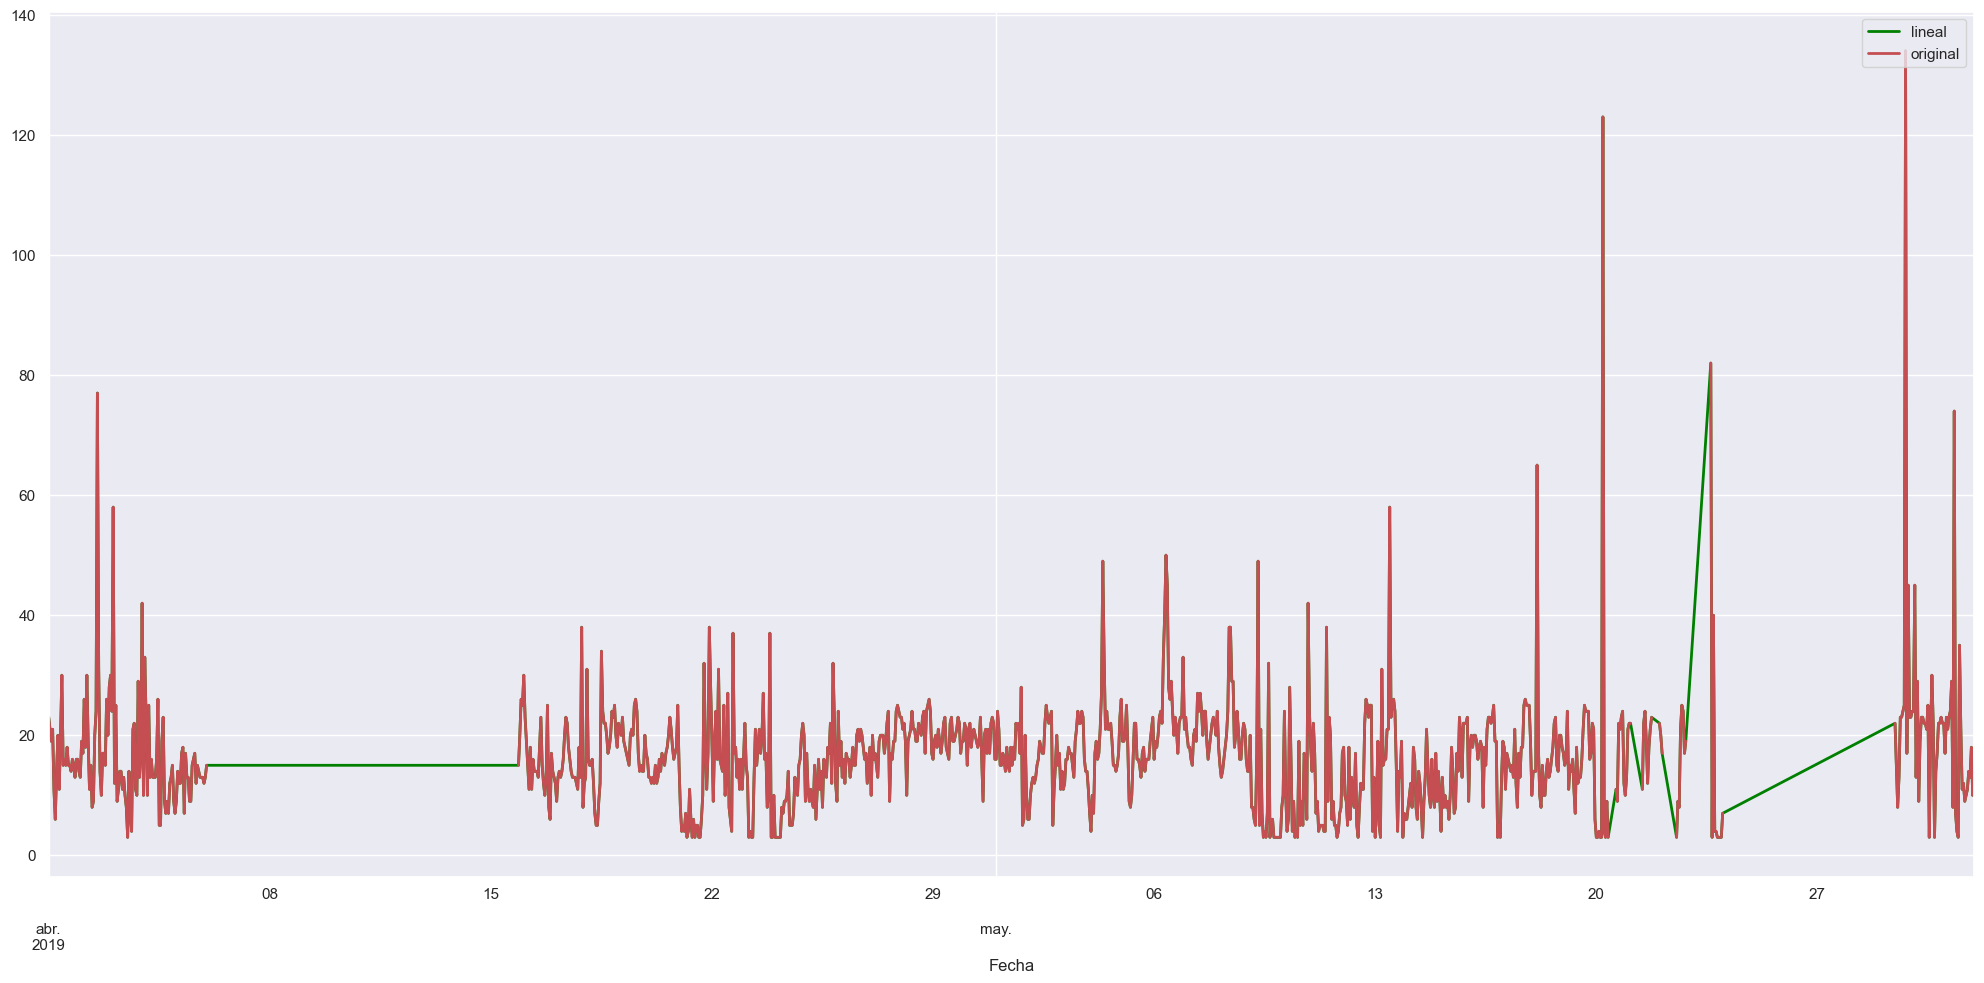

In [604]:
ax = data_lineal['2019-04-01 00:00:00':'2019-05-31 23:00:00']["NOX (µg/m³N)"].plot(color='green',linewidth=2)
data['2019-04-01 00:00:00':'2019-05-31 23:00:00']["NOX (µg/m³N)"].plot(ax=ax,figsize=[20, 10],color='r', linewidth=2)


ax.set_xlabel("Fecha")
ax.legend(loc='upper right', labels = ['lineal','original'])
plt.tight_layout()

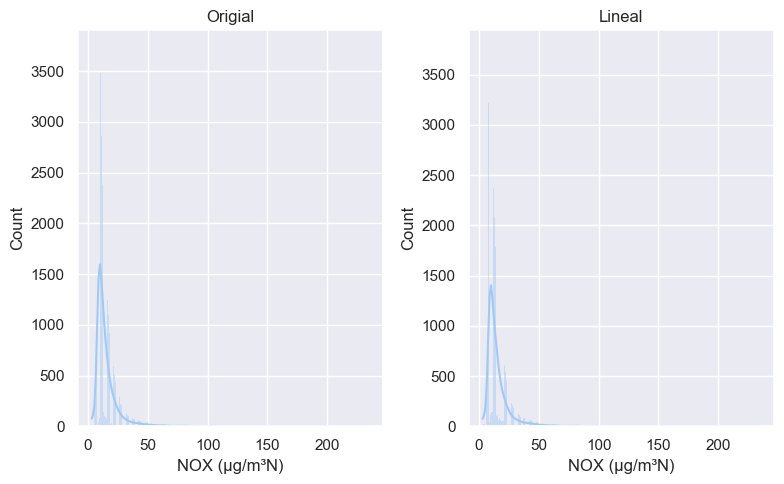

In [605]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
series = [data["NOX (µg/m³N)"],data_lineal["NOX (µg/m³N)"]]
titulos = ['Origial','Lineal']
axs = axs.flatten()
sns.set(font_scale = 1)
for df, ax, titulo in  zip(series,axs,titulos):
    sns.histplot(df,kde=True,stat='count', ax=ax)
    ax.set_title(titulo)
fig.tight_layout()
plt.show()

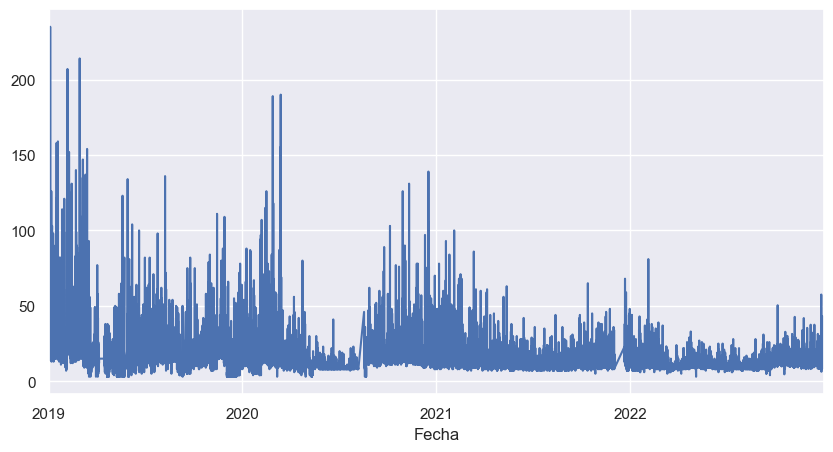

In [606]:
ax = data_lineal["NOX (µg/m³N)"].plot(figsize=(10, 5))


In [607]:
data_lineal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2019-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    35064 non-null  float64
 1   NO2 (µg/m³N)   35064 non-null  float64
 2   SO2 (µg/m³N)   35064 non-null  float64
 3   O3 (µg/m³N)    35064 non-null  float64
 4   TMP (ºC)       35064 non-null  float64
 5   HR (% H.R.)    35064 non-null  float64
 6   NOX (µg/m³N)   35064 non-null  float64
 7   DD (grados)    35064 non-null  float64
 8   PRB (mb)       35064 non-null  float64
 9   RS (W/m³)      35064 non-null  float64
 10  VV (m/s)       35064 non-null  float64
 11  C6H6 (µg/m³N)  35064 non-null  float64
 12  C7H8 (µg/m³N)  35064 non-null  float64
 13  XIL (µg/m³N)   35064 non-null  float64
 14  PM10 (µg/m³N)  35064 non-null  float64
dtypes: float64(15)
memory usage: 5.3 MB


In [608]:
data_lineal.head()

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N)
Fecha,,,,,,,,,,,,,,,
2019-01-01 00:00:00,3.0,18.0,14.0,55.0,11.0,72.0,23.0,295.0,1029.0,3.0,1.0,0.1,0.3,0.3,10.0
2019-01-01 01:00:00,4.0,19.0,14.0,57.0,11.0,61.0,24.0,292.0,1029.0,2.0,1.0,0.1,0.3,0.3,8.0
2019-01-01 02:00:00,4.0,20.0,16.0,48.0,10.0,65.0,26.0,299.0,1029.0,2.0,1.0,0.1,0.3,0.3,12.0
2019-01-01 03:00:00,4.0,18.0,14.0,47.0,9.0,68.0,23.0,302.0,1028.0,3.0,1.0,0.1,0.3,0.3,8.0
2019-01-01 04:00:00,4.0,12.0,16.0,55.0,10.0,64.0,18.0,298.0,1029.0,3.0,1.0,0.1,0.3,0.3,5.0


## Establecer Frecuencia del Dataset

In [609]:
data_lineal.asfreq('D')

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N)
Fecha,,,,,,,,,,,,,,,
2019-01-01,3.0,18.0,14.0,55.0,11.0,72.0,23.0,295.0,1029.0,3.0,1.0,0.1,0.3,0.3,10.00
2019-01-02,4.0,23.0,14.0,45.0,10.0,93.0,28.0,301.0,1028.0,2.0,1.0,0.1,0.3,0.3,16.00
2019-01-03,4.0,23.0,19.0,38.0,9.0,97.0,29.0,300.0,1026.0,2.0,1.0,0.1,0.3,0.3,9.00
2019-01-04,7.0,36.0,12.0,7.0,9.0,100.0,47.0,279.0,1028.0,4.0,1.0,0.1,0.3,0.3,22.00
2019-01-05,9.0,36.0,11.0,16.0,7.0,100.0,49.0,302.0,1030.0,3.0,1.0,0.1,0.3,0.3,19.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2.6,11.2,3.7,12.6,12.0,88.0,15.2,306.0,1028.0,3.0,1.0,0.1,0.3,0.2,23.70
2022-12-28,2.4,9.8,6.0,38.4,10.0,95.0,13.6,302.0,1028.0,3.0,1.0,0.1,0.3,0.2,21.44
2022-12-29,2.2,11.0,2.7,34.9,11.0,100.0,14.4,306.0,1023.0,3.0,1.0,0.1,0.3,0.2,29.53


In [610]:
fechas_esperadas =  pd.date_range(start=data_lineal.index.min(), end=data_lineal.index.max(), freq='D')
fechas_perdidas = fechas_esperadas.difference(data_lineal.index)
fechas_perdidas

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [611]:
print(f'Tenemos un tota de {len(fechas_perdidas)} fechas perdidas')

Tenemos un tota de 0 fechas perdidas


In [612]:
data_lineal = data_lineal.reindex(fechas_esperadas)
data_lineal

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N)
2019-01-01,3.0,18.0,14.0,55.0,11.0,72.0,23.0,295.0,1029.0,3.0,1.0,0.1,0.3,0.3,10.00
2019-01-02,4.0,23.0,14.0,45.0,10.0,93.0,28.0,301.0,1028.0,2.0,1.0,0.1,0.3,0.3,16.00
2019-01-03,4.0,23.0,19.0,38.0,9.0,97.0,29.0,300.0,1026.0,2.0,1.0,0.1,0.3,0.3,9.00
2019-01-04,7.0,36.0,12.0,7.0,9.0,100.0,47.0,279.0,1028.0,4.0,1.0,0.1,0.3,0.3,22.00
2019-01-05,9.0,36.0,11.0,16.0,7.0,100.0,49.0,302.0,1030.0,3.0,1.0,0.1,0.3,0.3,19.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2.6,11.2,3.7,12.6,12.0,88.0,15.2,306.0,1028.0,3.0,1.0,0.1,0.3,0.2,23.70
2022-12-28,2.4,9.8,6.0,38.4,10.0,95.0,13.6,302.0,1028.0,3.0,1.0,0.1,0.3,0.2,21.44
2022-12-29,2.2,11.0,2.7,34.9,11.0,100.0,14.4,306.0,1023.0,3.0,1.0,0.1,0.3,0.2,29.53
2022-12-30,2.4,12.5,2.1,30.0,12.0,95.0,16.2,240.0,1023.0,2.0,1.0,0.1,0.3,0.2,27.52


In [613]:
data_anual = pd.DataFrame(data_lineal)
data_anual['Año'] = data_anual.index.year
data_anual

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N),Año
2019-01-01,3.0,18.0,14.0,55.0,11.0,72.0,23.0,295.0,1029.0,3.0,1.0,0.1,0.3,0.3,10.00,2019
2019-01-02,4.0,23.0,14.0,45.0,10.0,93.0,28.0,301.0,1028.0,2.0,1.0,0.1,0.3,0.3,16.00,2019
2019-01-03,4.0,23.0,19.0,38.0,9.0,97.0,29.0,300.0,1026.0,2.0,1.0,0.1,0.3,0.3,9.00,2019
2019-01-04,7.0,36.0,12.0,7.0,9.0,100.0,47.0,279.0,1028.0,4.0,1.0,0.1,0.3,0.3,22.00,2019
2019-01-05,9.0,36.0,11.0,16.0,7.0,100.0,49.0,302.0,1030.0,3.0,1.0,0.1,0.3,0.3,19.00,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2.6,11.2,3.7,12.6,12.0,88.0,15.2,306.0,1028.0,3.0,1.0,0.1,0.3,0.2,23.70,2022
2022-12-28,2.4,9.8,6.0,38.4,10.0,95.0,13.6,302.0,1028.0,3.0,1.0,0.1,0.3,0.2,21.44,2022
2022-12-29,2.2,11.0,2.7,34.9,11.0,100.0,14.4,306.0,1023.0,3.0,1.0,0.1,0.3,0.2,29.53,2022
2022-12-30,2.4,12.5,2.1,30.0,12.0,95.0,16.2,240.0,1023.0,2.0,1.0,0.1,0.3,0.2,27.52,2022


matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


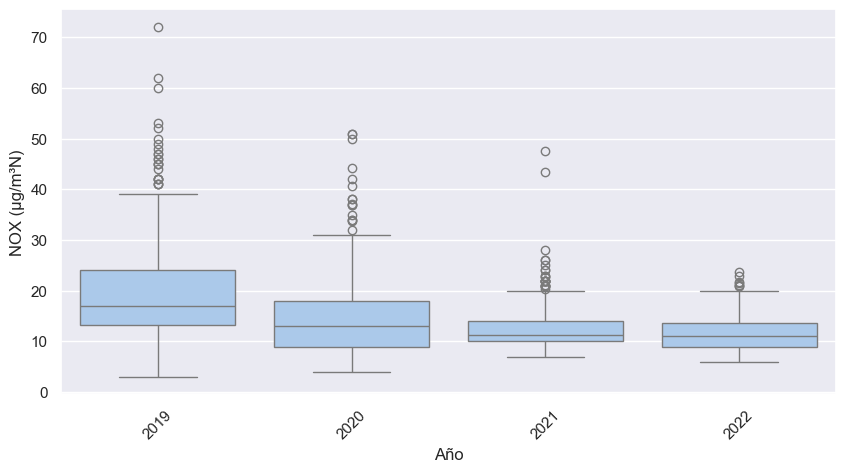

In [614]:
plt.figure(figsize=(10, 5))
sns.set_palette('pastel')

# Gráfico de cajas
sns.boxplot(x='Año', y='NOX (µg/m³N)', data=data_anual)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.show()

## Estacionalidad de la serie

Si todos los atributos obtienen un p-value menor que 0.05 podremos saber que la serie es estacionaria

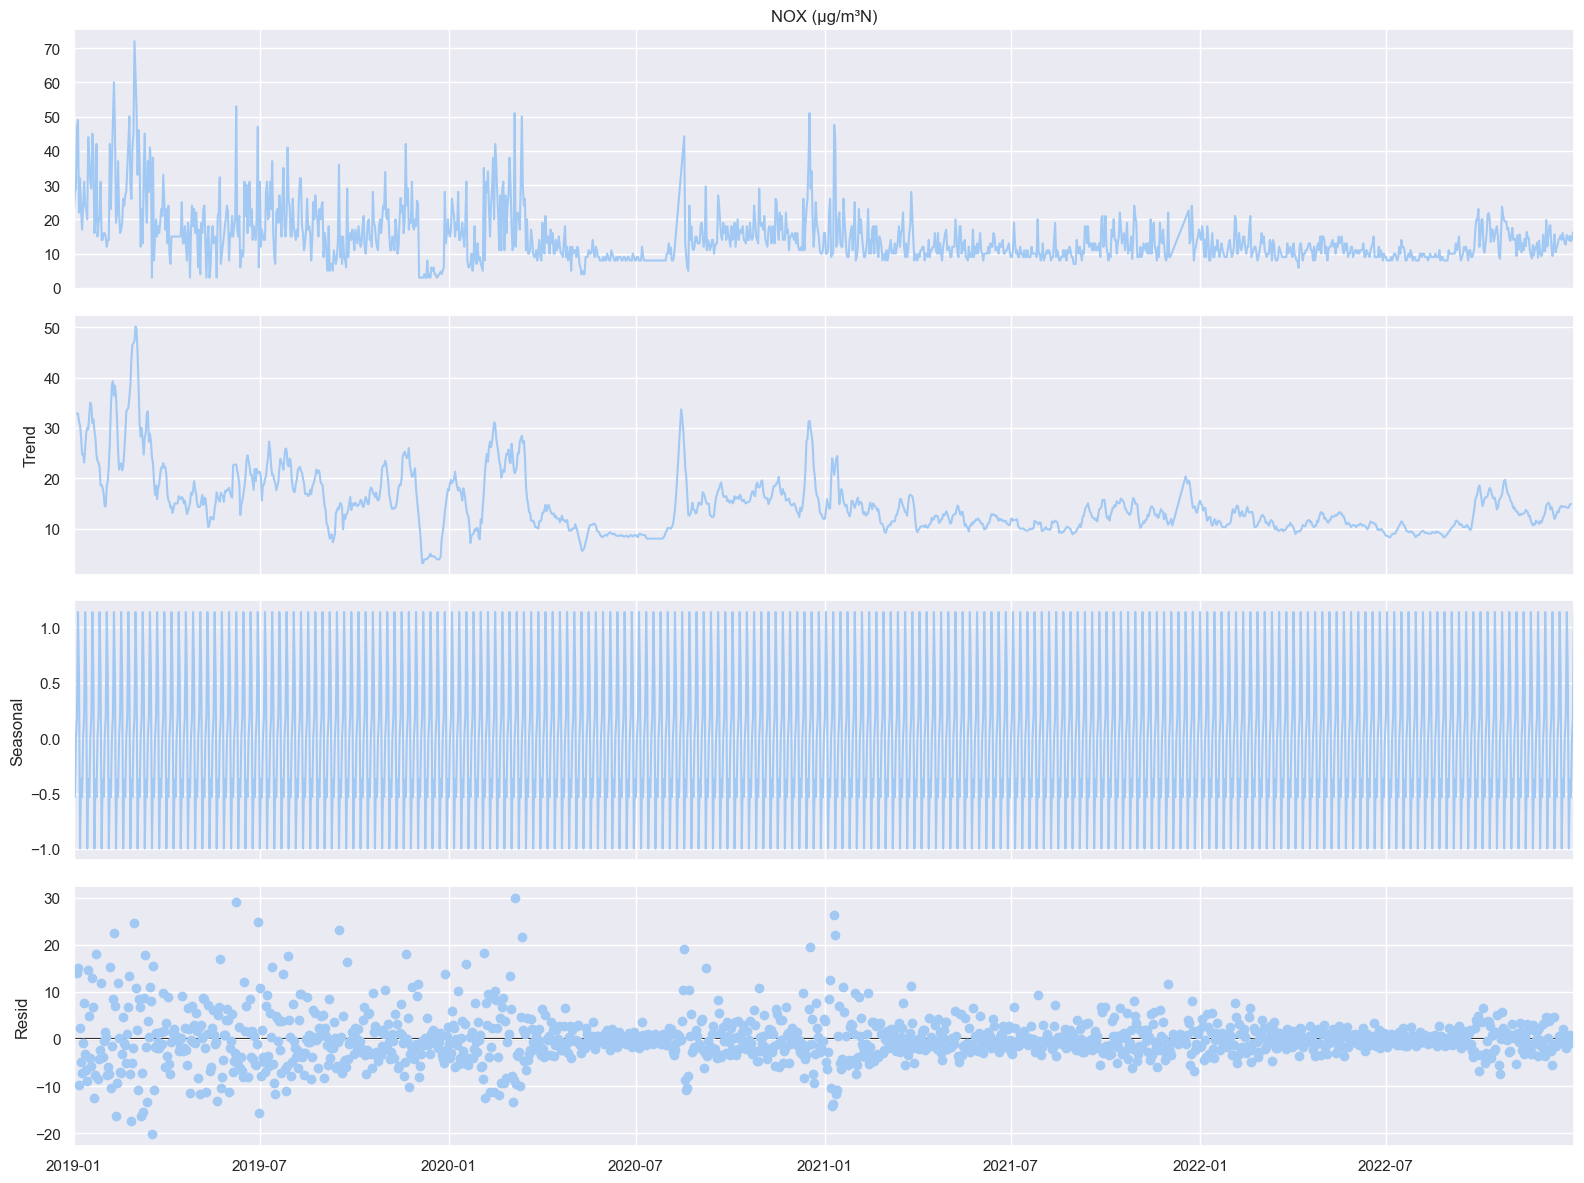

In [615]:
nox_dec = sm.tsa.seasonal_decompose(data_lineal["NOX (µg/m³N)"], model="aditive")
fig = nox_dec.plot()
fig.set_size_inches((16, 12))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [616]:
result = adfuller(data_lineal['NOX (µg/m³N)'])
print("---- NOX ----")
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

---- NOX ----
Estadístico ADF : -4.446059
p-value: 0.000246
Valores críticos:
	1%: -3.435
	5%: -2.864
	10%: -2.568


## Transformaciones 

# Entrenamiento y Validación

## Division Train y Test